<a href="https://colab.research.google.com/github/liscandeia/Codelab_Data/blob/main/houseSalePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISE DE VARIÁVEIS INFLUENTES NO PREÇOS

In [12]:
#LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Exibição pandas
pd.set_option('display.max_columns', None)


In [7]:
#Carregar e exibir dados
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
#Verificando nulos
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#Verificando duplicatas
duplicatas = df.duplicated().sum()
print(duplicatas)

0


In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


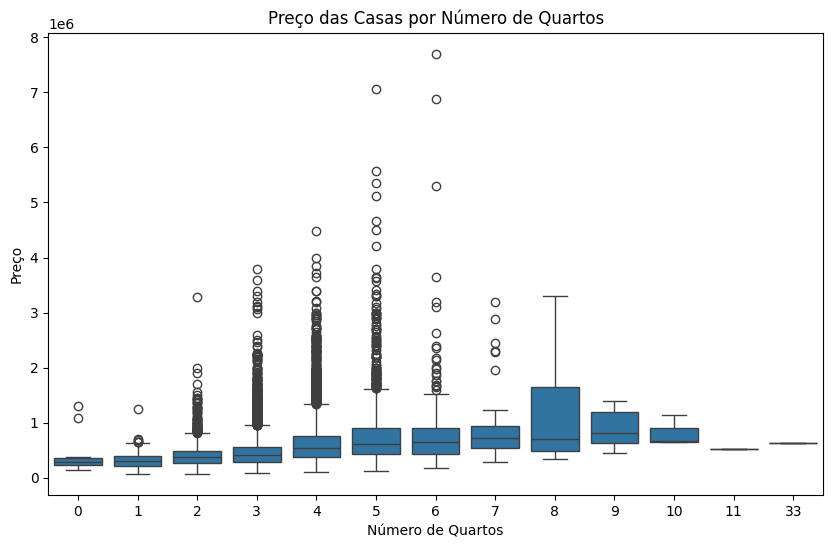

In [14]:
#Analisando preço por quarto
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Preço das Casas por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço')
plt.show()
#Conclui-se que o número de quartos começa a ter maior influencia no valor da casa
#Apartir de 4 quartos com um aumento mais significativo na media pois está quase
#Nos valores do inicio do terceiro quartil que seriam os 25 por cento mais caros das casas com
#3 quartos

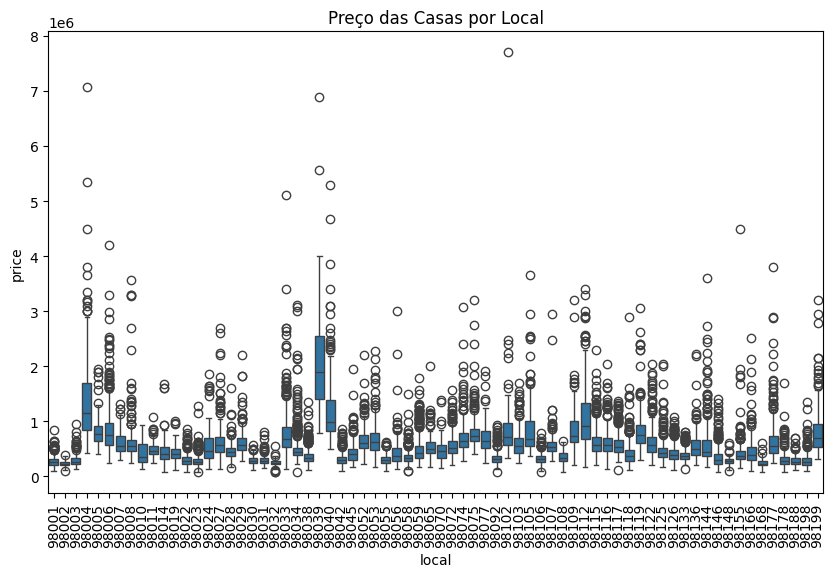

In [15]:
#Analisando preço por local
plt.figure(figsize=(10, 6))
sns.boxplot(x='zipcode', y='price', data=df)
plt.title('Preço das Casas por Local')
plt.xlabel('local')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.show()
#Conclui-se que a localização influencia completamente no valor da casa

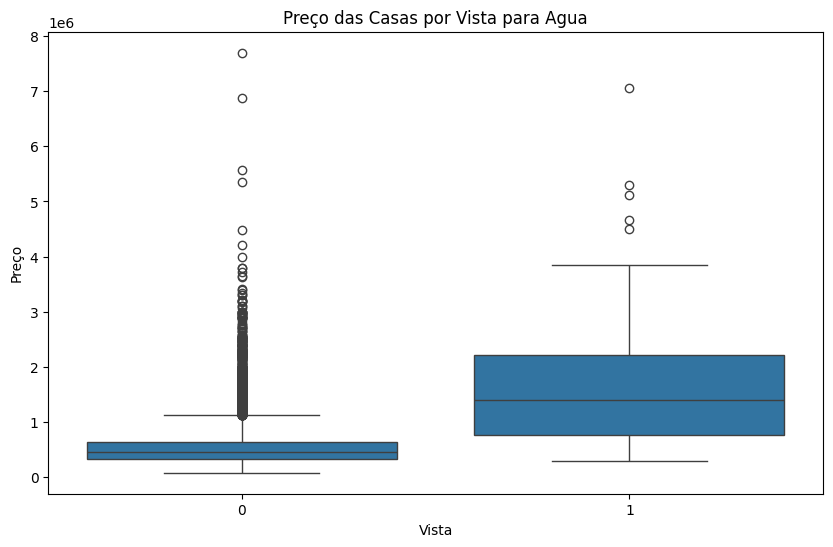

In [16]:
#Analisando preço por Vista
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Preço das Casas por Vista para Agua')
plt.xlabel('Vista')
plt.ylabel('Preço')
plt.show()
#Conclui-se que a vista pro mar não só influencia quanto o primeiro quartil de casas com vista
#  (25% dos valores minimos das casas) inicia pós o terceiro quartil das casas sem vista
#Mesmo as casas com vista mais acessíveis ainda têm preços mais altos do que as casas sem vista.

PREVISÃO DE VALORES

In [52]:
#Import
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [47]:
#Preparando os dados
#features - treino
x_treino = df.drop(['price', 'date', 'id'], axis=1 ) #tirar o que não vou usar pra pesar
#var resposta/alvo
y_treino = df['price'].copy()

In [48]:
#Treinamento com sklearn
# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_treino, y_treino, test_size=0.2, random_state=42)
#Definindo o modelo
modelo = lm.LinearRegression()
#Treinamento
modelo.fit(x_train,y_train)


LinearRegression()

In [49]:
#Fazendo predição
y_train_pred = modelo.predict(x_train)
y_test_pred = modelo.predict(x_test)

In [51]:
#verificando a performance do modelo no treino
verificacao = x_train.copy()
verificacao['price'] = y_train
verificacao['prediction'] = y_train_pred
verificacao['erro'] = verificacao['price'] - verificacao['prediction']
verificacao['erro_abs'] = abs(verificacao['erro'])
verificacao['erro_perc'] = (verificacao['erro_abs'] / verificacao['price']) * 100
verificacao[['price', 'prediction', 'erro', 'erro_abs','erro_perc' ]].head()


,price,prediction,erro,erro_abs,erro_perc
6325,325000.0,487301.301235,-162301.301235,162301.301235,49.938862
13473,257000.0,244429.831042,12570.168958,12570.168958,4.891116
17614,228500.0,146433.189553,82066.810447,82066.810447,35.915453
16970,288000.0,374834.711028,-86834.711028,86834.711028,30.150941
20868,479000.0,564846.853055,-85846.853055,85846.853055,17.922099


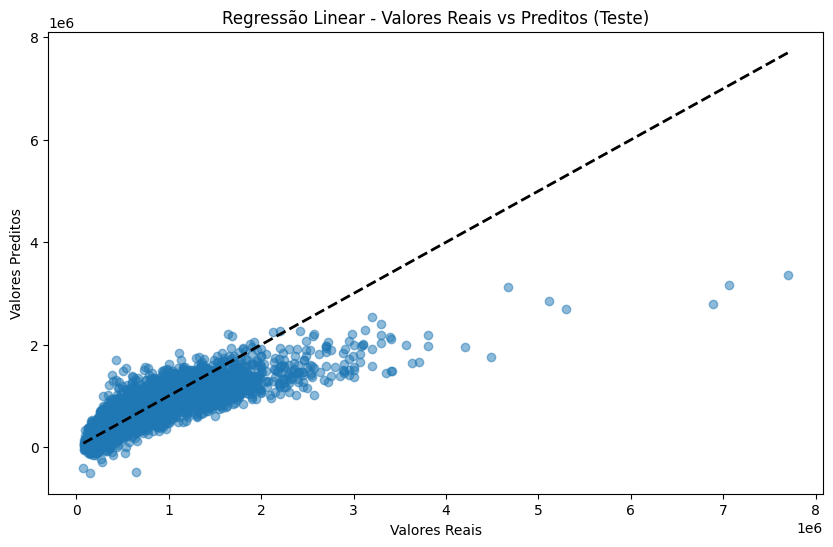

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(verificacao['price'], verificacao['prediction'], alpha=0.5)
plt.plot([verificacao['price'].min(), verificacao['price'].max()],
         [verificacao['price'].min(), verificacao['price'].max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Regressão Linear - Valores Reais vs Preditos (Teste)')
plt.show()

In [58]:
mae = mean_absolute_error(y_test, y_test_pred)
print('Média de erro: ',mae)

media_erro_percentual = verificacao['erro_perc'].mean()

print('Média de erro percentual: ' , media_erro_percentual)

Média de erro:  127493.34208657315
Média de erro percentual:  25.540501442855113
